In [1]:
import warnings
from dotenv import load_dotenv
from langchain_anthropic import ChatAnthropic
from langchain_huggingface import HuggingFaceEmbeddings


warnings.filterwarnings("ignore")
_ = load_dotenv(override=True)

embedding = HuggingFaceEmbeddings(
    model="sentence-transformers/all-MiniLM-L6-v2",
    model_kwargs={"device": "cpu"},
    encode_kwargs={"normalize_embeddings": False},
)

model_name = "claude-3-5-haiku-20241022"
llm = ChatAnthropic(temperature=0.1, model_name=model_name)

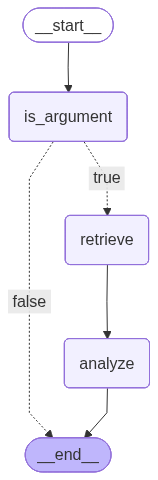

In [ ]:
from langchain_chroma import Chroma
from persuasion_bias.rag.graphs import BiasAnalystAgent


rag_system = BiasAnalystAgent(llm=llm, embedding=embedding, vectorstore=Chroma)
graph = rag_system._graph_fabricate()

graph

In [3]:
from functools import lru_cache
from persuasion_bias.core.state import AnalysisState


@lru_cache(maxsize=16)
def argue(query: str) -> AnalysisState:
    """Invokes graph to get bias analysis for the argument~"""

    response = graph.invoke({"query": query})
    return response

In [4]:
response = argue(query="Social media is harmful for the youth")

In [5]:
for msg in response["messages"]:
    msg.pretty_print()

================================== Ai Message ==================================

Retrieved 5 documents from knowledge base.
================================== Ai Message ==================================

Bias analysis completed.


In [6]:
response["is_argument"]

True

In [7]:
response["analysis"]

{'cialdini_principles': [{'principle': 'Authority',
   'confidence': 0.8,
   'evidence': 'Research has shown... studies clearly show',
   'severity': 'high'},
  {'principle': 'Social Proof',
   'confidence': 0.6,
   'evidence': 'Statistics about smartphone usage trends',
   'severity': 'medium'}],
 'logical_fallacies': ['appeal to emotion',
  'hasty generalization',
  'false dichotomy'],
 'emotional_manipulation_score': 0.7,
 'credibility_issues': ['lack of specific research citations',
  'generalized claims about technology impacts'],
 'target_audience_analysis': 'Parents and educators concerned about youth technology use, targeting emotional fears about child development',
 'overall_bias_score': 0.6}